In [1]:
using TracyWidomBeta,LinearAlgebra,Statistics,SparseArrays,Distributions,Trapz,ApproxFun,SpecialFunctions
using RandomMatrices,Plots,LaTeXStrings,TypedTables,StatsBase,FFTW

The following algorithm outputs the normalized frequencies of $n^{1/6}\left(\lambda_{\text{max}}\left(H^{\beta}_{n}\right)-2\sqrt{n}\right)$, where $\lambda_{\text{max}}\left(H^{\beta}_{n}\right)$ denotes the largest eigenvalue of the 
$\beta$-Hermite ensemble $H^{\beta}_{n}$, compared with the distributions generated by the finite-difference discretization.

In [2]:
function model_test(β,n)
    F_pdf=TW(β;pdf=true)
    k=10^6
    ei=zeros(k,1)
    for j=1:k
        N=rand(Normal(0,sqrt(2)), n)
        C1=vec(zeros(n-1,1))
        for i=1:n-1
            C1[i]=rand(Chi(β*(n-i)), 1)[1]
        end
        H=(1/sqrt(β))*SymTridiagonal(N,C1)
        ei[j]=n^(1/6)*(eigmax(H)[1]-2*sqrt(n))
    end
    s=Plots.histogram(ei,normed=true,label="Normed Histogram",xticks=([-5;-5:1:1;1],[-5;-5:1:1;1]),xtickfontsize=15,ytickfontsize=15,
                legendfontsize=10)
    Plots.plot!(F_pdf,xlims=[-5,1],label="Finite Difference",lw=5,xtickfontsize=15,ytickfontsize=15,
                legendfontsize=10)
    return s
end

model_test (generic function with 1 method)

The following normalized histograms for $n^{1/6}\left(\lambda_{\text{max}}(H^{\beta}_{n})-2\sqrt{n}\right)$ are generated with $10^6$ samples, $n=10^4$. The small positive bias in each histogram can be improved by using larger values of $n$.

For $\beta=3$, we have

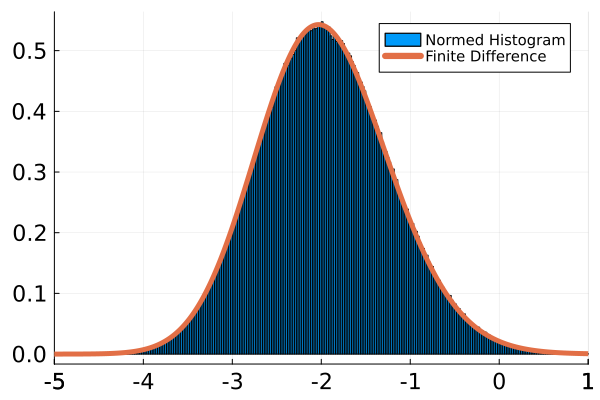

In [3]:
s=model_test(3,10^4)

For $\beta=5$, we have

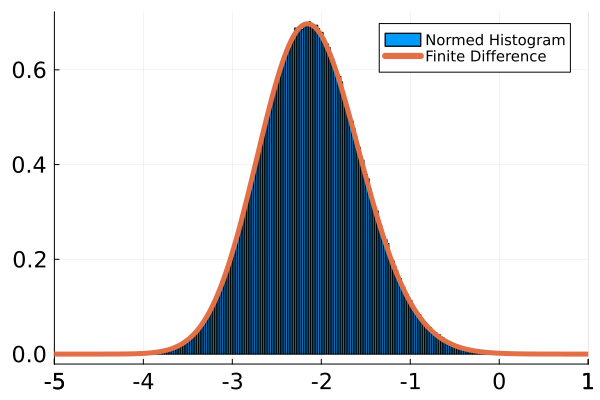

In [5]:
s=model_test(5,10^4)

For $\beta=6$, we have

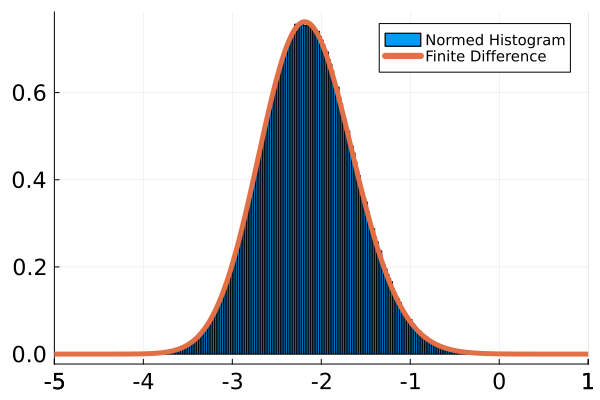

In [7]:
s=model_test(6,10^4)

For $\beta=7$, we have

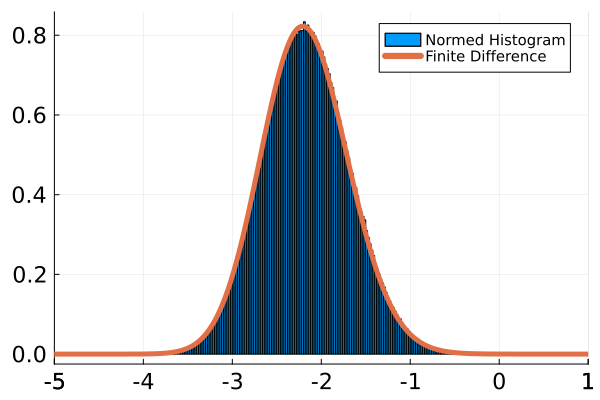

In [9]:
s=model_test(7,10^4)